In [1]:
!source activate py2

In [6]:
from OCC_class import *
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder

In [7]:
% matplotlib inline

In [8]:
import sklearn.datasets
X, labels = sklearn.datasets.load_svmlight_file("usps")

In [9]:
X = X.toarray()
enc = OneHotEncoder()
labels_enc = enc.fit_transform(np.reshape(labels, (len(labels),1))).toarray()

x = np.concatenate([X, labels_enc], axis = 1)


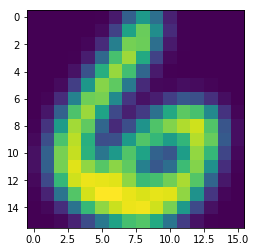

In [11]:
plt.imshow(np.reshape(X[0,:], (16, 16)))

In [12]:
nu = 0.05
sigma2 = 0.5*256
n = 4000

occ = OSVM(x[:n,:])
#occ = OkMeans(x[:n,:])

occ.fit(nu, sigma2) # OSVM
#occ.fit(thresh = 1, k = 10) # kNN & Kmeans

In [13]:
pred = occ.predict(x[:n,:])
if len(pred.shape) == 2:
    pred = pred[:,0]

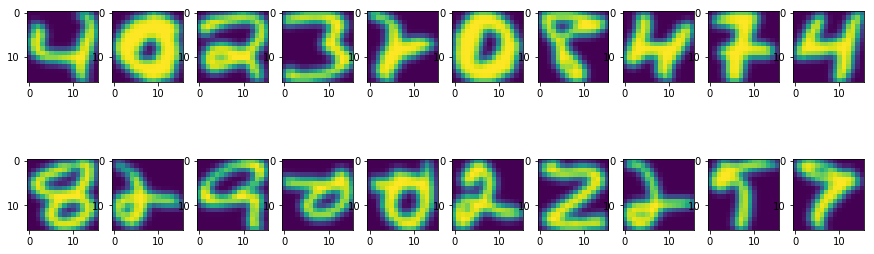

In [14]:
ix_worse = np.argsort(pred, axis = 0)
plt.figure(figsize = (15,5))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(np.reshape(X[ix_worse[i],:], (16,16)))
    plt.subplot(2,10,i+11)
    plt.imshow(np.reshape(X[ix_worse[i+10],:], (16,16)))